<a href="https://colab.research.google.com/github/evmpython/CAT010_UNIFEI_2024/blob/main/CAT010_Aula_06_plota_NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Disciplina CAT010** - Aplicações dos Satélites em Ciências Atmosféricas


---






## **Aula Prática 6:** $\underline{Analisando\ Dados\ de\ Índice\ de\ Vegetação\ (NDVI)}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como gerar e analisar mapas de  *Normalized Difference Vegetation Index* (NDVI) estimado por satélite de órbita polar. Serão utilizados os dados do sensor [Moderate-resolution Imaging Spectro-radiometer - MODIS](https://space.oscar.wmo.int/instruments/view/modis) que esta abordo dos satélites [AQUA](https://space.oscar.wmo.int/satellites/view/aqua) e [TERRA](https://space.oscar.wmo.int/satellites/view/terra).

---


**DADOS DE ENTRADA**: Arquivos de NDVI de satélite polar.

- **Tipo do dado:** matriz de 3600 linhas x 7200 colunas  
- **Resolução espacial**: 0.05°
- **Resolução temporal**: mensal
- **Carregamento dos dados:** Via Protocolo OPeNDAP. URL OPeNDAP - http://apdrc.soest.hawaii.edu:80/dods/public_data/satellite_product/MODIS_vegi/monthly_v6.1

- **Informações sobre os dados**: [Acessar aqui](http://apdrc.soest.hawaii.edu/datadoc/modis_vegi.php)
- **Fonte dos dados:** FTP do [Asia-Pacific Data Research Center](http://apdrc.soest.hawaii.edu/dods/public_data/satellite_product) que pertence a Universidade do Hawai.


---


**DADOS DE SAÍDA:** Mapas de NDVI.
- **Tipo do dado:** Figura
- **Formato do dado:** arquivos JPG
- **Imagens geradas:**
    1. Fig_1_ndvi_global_mensal_202002.jpg
    2. Fig_2_ndvi_America_Sul_mensal_202002.jpg
    3. Fig_3_ndvi_global_anual_2020.jpg
    4. Fig_4_ndvi_America_Sul_anual_2020.jpg

---

**METODOLOGIA:** Serão abordados os seguintes tópicos:

1.   Como carregar os dados de NDVI via Protocolo OPeNDAP.
2.   Como plotar o mapa espacial do NDVI para um determinado mês.
3.   Como plotar o mapa espacial do NDVI para um determinado ano.

---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Download de arquivos auxiliares
3.   Monta o google drive
4.   Define o caminho do google drive
5.   Importação das bibliotecas
6.   Informa o ano de processamento
7.   Carrega os dados
8.   Plota NDVI mensal
9.  Plota NDVI anual


---
**OBSERVAÇÕES IMPORTANTES**:
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive

---
- **Realizado por:** Enrique V. Mattos - 23/08/2022
- **Atualizado por:** Enrique V. Mattos - 14/11/2024


---

# **1° Passo:** Instalando as bibliotecas

In [1]:
# Instalando o proplot
!pip install -q proplot

# Instalando o cartopy
!pip uninstall -q shapely --yes
!pip install -q shapely cartopy==0.21.1 --no-binary shapely --no-binary cartopy

# Instalando o xarray e suas dependências
!pip install -q "numpy<2.0" xarray dask netCDF4 bottleneck pydap

- Chegando aqui, será necessário fazer a `Reinicialização do Ambiente de Execução`. Para isto, você deverá acessar `Ambiente de execução`, localizado na barra de ferramentas e clicar em `Reiniciar Sessão`. Como indicado na imagem abaixo.

- Em seguida você deverá rodar novamente a célula anterior de instalações, de forma que as bibliotecas sejam instaladas novamente.

- Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab. Então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual da nossa aula prática.

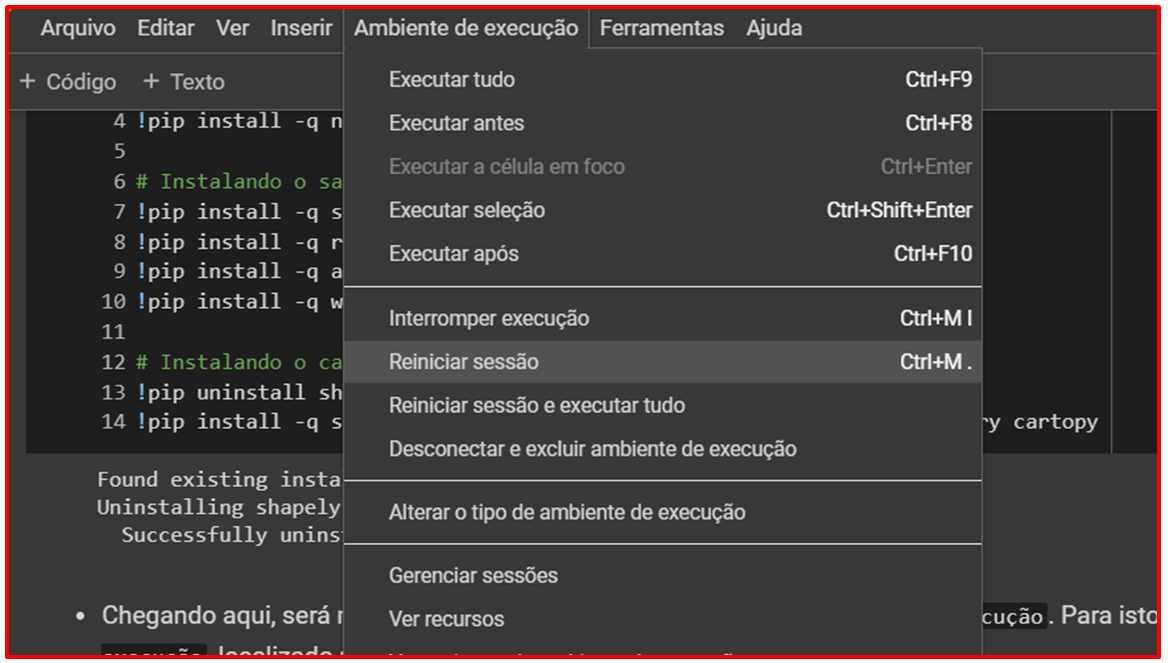

In [2]:
# Instalando a biblioteca Salem
!pip install -q rasterio pyproj geopandas salem descartes boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 4.3 MB/s eta 0:00:00


# **2° Passo:** Download de Arquivos Auxiliares

In [3]:
# Download do arquivo "utilities.py"
!wget -c https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/utils/utilities.py

# Download da paleta de cores para o NDVI
!wget -c https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/utils/NDVI.cpt

--2024-11-14 20:27:54--  https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/utils/utilities.py
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/evmpython/CAT010_UNIFEI_2024/main/utils/utilities.py [following]
--2024-11-14 20:27:54--  https://raw.githubusercontent.com/evmpython/CAT010_UNIFEI_2024/main/utils/utilities.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17330 (17K) [text/plain]
Saving to: ‘utilities.py’

utilities.py        100%[===================>]  16.92K  --.-KB/s    in 0.006s  

2024-11-14 20:27:55 (2.78 MB/s) - ‘utilities.py’ saved [17330/17330]

--2024-11-14 20:27:55--

# **3° Passo:** Montando drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **4° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**


- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [5]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_06_NDVI/'

- **Criando a pasta de saída ("output")**

In [6]:
import os
os.makedirs(f'{dir}output/', exist_ok=True)

# **5° Passo:** Importando as bibliotecas

In [7]:
import xarray as xr
import proplot as plot
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import time
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import salem
from utilities import loadCPT
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


# **PARTE 1):** Informando a data da imagem - **### >>> MUDANÇAS AQUI <<< ###**

- Iremos carregar e analisar os dados de NDVI para um ano específico. No exemplo a seguir faremos uma análise para o ano de **2022**. Porém, você pode alterar para o ano que desejar.

In [8]:
ano = '2022'

# **PARTE 2):** Carregando os dados


- Uma das grandes dificuldades em trabalhar com dados `globais` de variáveis meteorológicas, é a necessidade de **baixar** e **processar** um grande volume de dados. O que muitas das vezes demanda um computador com um bom processamento e uma forte capacidade para armazenar esses dados.

- Para resolver esse problema, podemos acessar a base de dados disponibilizadas em algum site ou FTP.

- Para isto o **Asia-Pacific Data Research Center** que é parte do International Pacific Research Center da **Universidade do Hawai** em Mānoa, financiado em parte pela National Oceanic and Atmospheric Administration (NOAA) disponibiliza uma série de conjuntos de dados atmosféricos através do protocolo [**OPEnDAP**](http://apdrc.soest.hawaii.edu/data/data.php?discipline_index=3) como:

    1. [GPM IMERG L3 precipitation](http://apdrc.soest.hawaii.edu/dods/public_data/satellite_product/GPM_IMERG)

    2. [ECMWF ERA5](http://apdrc.soest.hawaii.edu/dods/public_data/Reanalysis_Data/ERA5)

    3. [LIS-OTD Lightning](http://apdrc.soest.hawaii.edu/dods/public_data/satellite_product/LIS-OTD-lightning-data)

    4. [CMIP5](http://apdrc.soest.hawaii.edu/dods/public_data/CMIP5/)

    5. E etc

* O `Xarray` permite acessar dados diretamente na nuvem em servidores que utilizam diretórios chamados de [**THREDDS Catalogs**](https://www.unidata.ucar.edu/software/tds/current/catalog/), com o uso do protocolo [**OPeNDAP**](https://www.opendap.org/).

- Para ler os dados direto da nuvem podemos utilizar a função [**open_dataset**](https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html) da biblioteca [xarray](https://docs.xarray.dev/en/stable/) do Python. Como exemplo, para ler dados de precipitação diária do IMERGE. Exemplo: ds = xr.open_dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/satellite_product/GPM_IMERG/daily_final_run
').

- **Observação:** Uma segunda opção de site para baixar dados climáticos via protocolo OPeNDAP em formato Netcdf, é através desse site da [**NOAA**](https://psl.noaa.gov/data/gridded/), como os dados de Temperatura da Superfície do Mar (ERSSTv5), Precipitação do GPCC e outros. Para acessar os dados de **Temperatura do Ar** da [**University of Delaware**](https://psl.noaa.gov/data/gridded/data.UDel_AirT_Precip.html) diretamente do servidor da NOAA através do seu link, que pode ser encontrado no [site acima](https://psl.noaa.gov/thredds/catalog/Datasets/catalog.html).

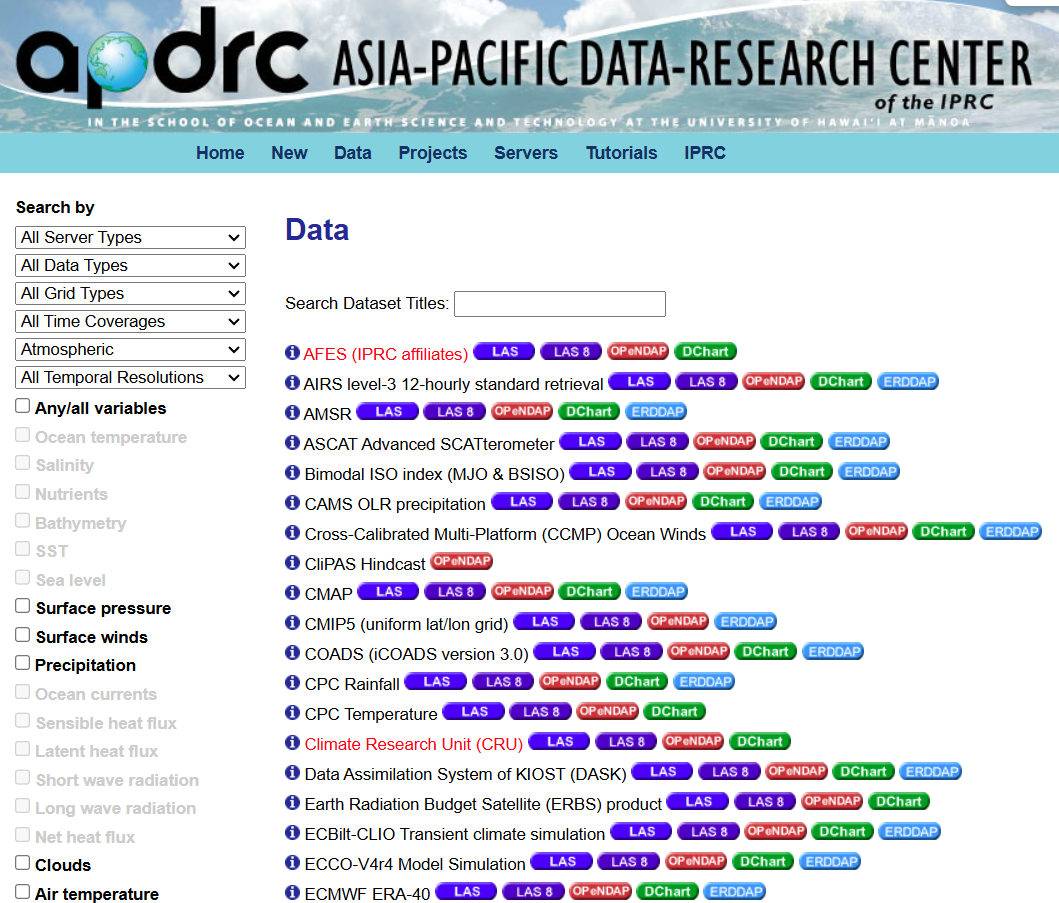

- Iremos carregar os dados do ano todo de uma única vez, e produziremos um único conjunto de dados. Conforme comentei anteriormente usaremos a biblioteca [**xarray**](https://docs.xarray.dev/en/stable/) com a função [**open_dataset**](https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html).

In [9]:
# carregando os dados
indices_vegetacao = xr.open_dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/satellite_product/MODIS_vegi/monthly_v6.1')

In [10]:
# mostrando os dados
indices_vegetacao

<xarray.Dataset> Size: 123GB
Dimensions:  (time: 296, lat: 3600, lon: 7200)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-02-01 2000-03-01 ... 2024-09-01
  * lat      (lat) float64 29kB -90.0 -89.95 -89.9 -89.85 ... 89.85 89.9 89.95
  * lon      (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.8 179.9 179.9
Data variables:
    ndvi     (time, lat, lon) float32 31GB ...
    ndvi_sd  (time, lat, lon) float32 31GB ...
    evi      (time, lat, lon) float32 31GB ...
    evi_sd   (time, lat, lon) float32 31GB ...
Attributes:
    title:          MODIS Vegetation Indices (MOD13C2) Version 6.1
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/datadoc/modis_vegi.php
    history:        Tue Nov 05 13:38:38 HST 2024 : imported by GrADS Data Ser...

In [11]:
# escolhendo o NDVI
ndvi = indices_vegetacao['ndvi']

In [12]:
# mostrando o dado
ndvi

<xarray.DataArray 'ndvi' (time: 296, lat: 3600, lon: 7200)> Size: 31GB
[7672320000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-02-01 2000-03-01 ... 2024-09-01
  * lat      (lat) float64 29kB -90.0 -89.95 -89.9 -89.85 ... 89.85 89.9 89.95
  * lon      (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.8 179.9 179.9
Attributes:
    long_name:  ndvi

In [13]:
# mostrando os tempos
ndvi['time']

<xarray.DataArray 'time' (time: 296)> Size: 2kB
array(['2000-02-01T00:00:00.000000000', '2000-03-01T00:00:00.000000000',
       '2000-04-01T00:00:00.000000000', ..., '2024-07-01T00:00:00.000000000',
       '2024-08-01T00:00:00.000000000', '2024-09-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-02-01 2000-03-01 ... 2024-09-01
Attributes:
    grads_dim:      t
    grads_mapping:  linear
    grads_size:     296
    grads_min:      00z01feb2000
    grads_step:     1mo
    long_name:      time
    minimum:        00z01feb2000
    maximum:        00z01sep2024
    resolution:     30.437288

In [14]:
# mostrando as longitudes
ndvi['lon']

<xarray.DataArray 'lon' (lon: 7200)> Size: 58kB
array([-180.  , -179.95, -179.9 , ...,  179.85,  179.9 ,  179.95])
Coordinates:
  * lon      (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.8 179.9 179.9
Attributes:
    grads_dim:      x
    grads_mapping:  linear
    grads_size:     7200
    units:          degrees_east
    long_name:      longitude
    minimum:        -180.0
    maximum:        179.95
    resolution:     0.05

In [15]:
# mostrando as latitudes
ndvi['lat']

<xarray.DataArray 'lat' (lat: 3600)> Size: 29kB
array([-90.  , -89.95, -89.9 , ...,  89.85,  89.9 ,  89.95])
Coordinates:
  * lat      (lat) float64 29kB -90.0 -89.95 -89.9 -89.85 ... 89.85 89.9 89.95
Attributes:
    grads_dim:      y
    grads_mapping:  linear
    grads_size:     3600
    units:          degrees_north
    long_name:      latitude
    minimum:        -90.0
    maximum:        89.95
    resolution:     0.05

# **PARTE 3):** Plotando NDVI `MENSAL`
- Nesta etapa iremos gerar um mapa mensal máximo de NDVI. Para isto precisaremos informar qual mês gostaríamos de analisar. Para esta análise usaremos como exemplo o mês de **fevereiro** de 2022.

## **Informando o mês dos dados:** - **### >>> MUDANÇAS AQUI <<< ###**

In [16]:
ano = '2022'
mes = '02'
mesx = int(mes)

In [17]:
# seleciona o dado de NDVI daquele mês
ndvi_mes = ndvi.loc[f'{ano}-{mes}-01']
ndvi_mes

<xarray.DataArray 'ndvi' (lat: 3600, lon: 7200)> Size: 104MB
[25920000 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 8B 2022-02-01
  * lat      (lat) float64 29kB -90.0 -89.95 -89.9 -89.85 ... 89.85 89.9 89.95
  * lon      (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.8 179.9 179.9
Attributes:
    long_name:  ndvi

## **a) Plotando figura `MENSAL` global**

CPU times: user 1min 17s, sys: 5.84 s, total: 1min 23s
Wall time: 2min 49s


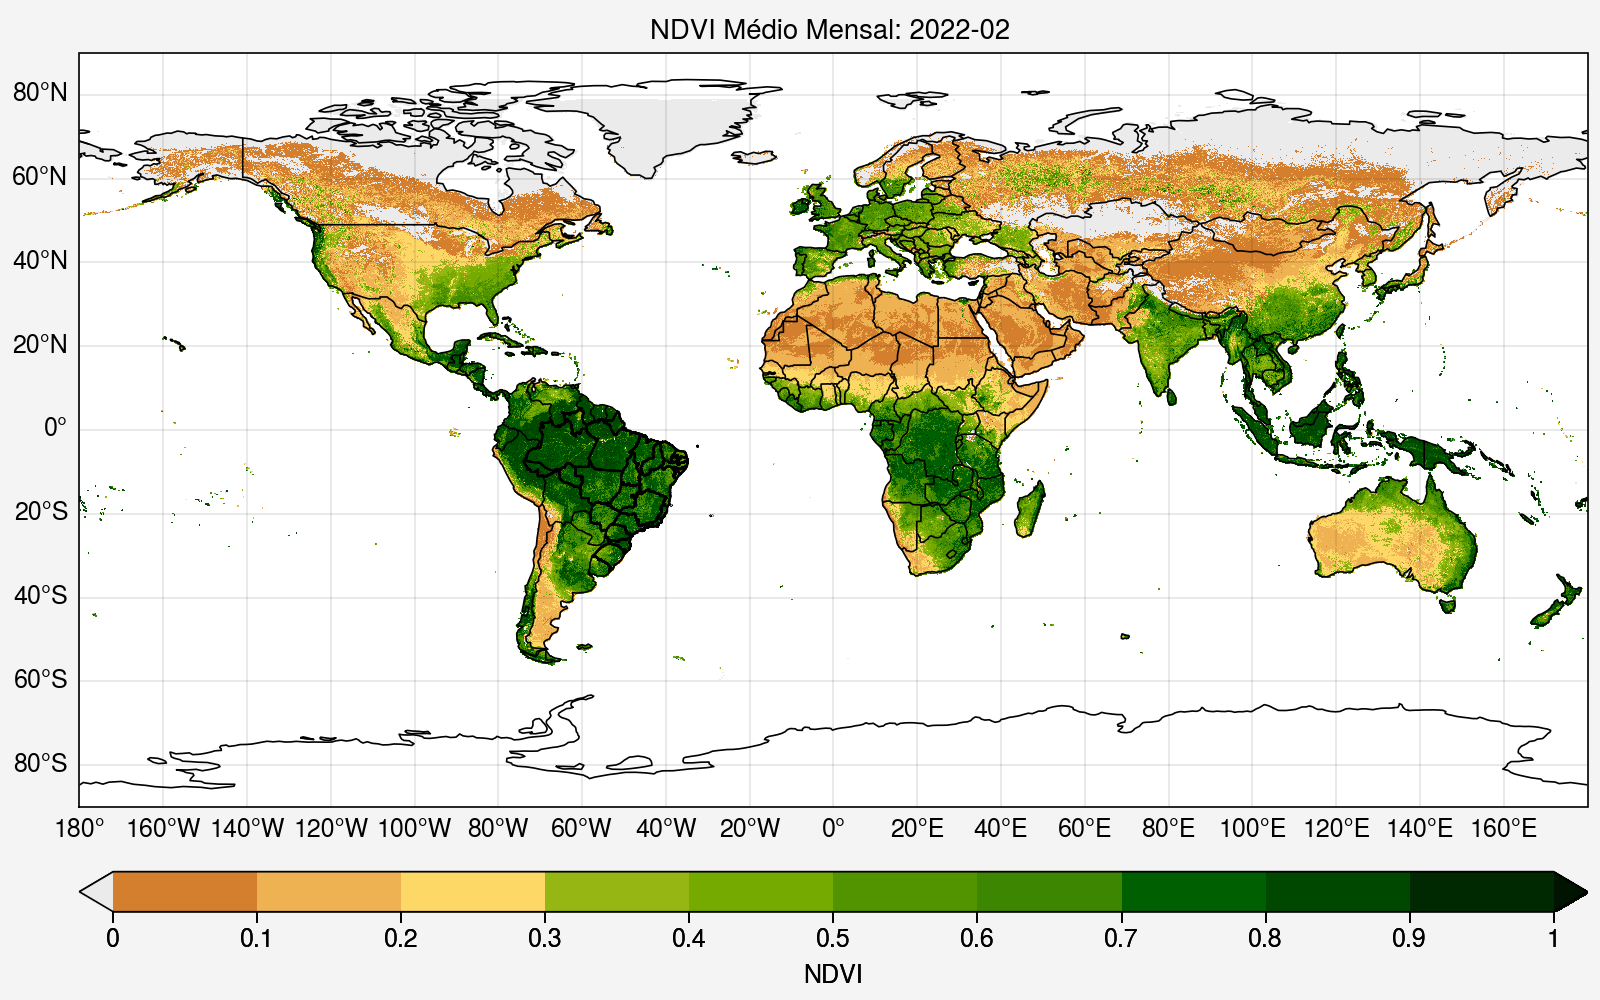

In [18]:
%%time
# cria moldura da figura
fig, ax = plot.subplots(figsize=(8, 5), tight=True, proj='pcarree')

# configuração dos eixos
ax.format(coast=True, borders=True, innerborders=False,
          labels=True,
          latlines=20, lonlines=20,
          title=f'NDVI Médio Mensal: {ano}-{mes} ')

# carrega tabela de cores
cpt_ndvi = loadCPT('/content/NDVI.cpt')
cpt_convert_ndvi = LinearSegmentedColormap('cpt_ndvi', cpt_ndvi)

# plota figura
map1 = ax.pcolormesh(ndvi_mes['lon'],
                     ndvi_mes['lat'],
                     ndvi_mes[:,:]/10000.,
                     vmin=0,
                     vmax=1,
                     cmap=cpt_convert_ndvi,
                     levels=plot.arange(0, 1, 0.1),
                     extend='both')

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8, zorder=2)

# plota barra de cores
fig.colorbar(map1, loc='b', label='NDVI')

# salva figura
fig.save(f'{dir}output/Fig_1_ndvi_global_mensal_{ano}{mes}.jpg', dpi=300, bbox_inches='tight')

## **b) Plotando figura `MENSAL` setorizada**

In [19]:
# mostrando o dado que usaremos
ndvi_mes

<xarray.DataArray 'ndvi' (lat: 3600, lon: 7200)> Size: 104MB
[25920000 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 8B 2022-02-01
  * lat      (lat) float64 29kB -90.0 -89.95 -89.9 -89.85 ... 89.85 89.9 89.95
  * lon      (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.8 179.9 179.9
Attributes:
    long_name:  ndvi

In [20]:
# define a região de recorte
lonmin_AS, lonmax_AS, latmin_AS, latmax_AS = -85, -31, -59, 15

# realiza o recorte nos dados
ndvi_mes_rec = ndvi_mes.sel(lon=slice(lonmin_AS, lonmax_AS), lat=slice(latmin_AS, latmax_AS))

# mostra o dado recortado
ndvi_mes_rec

<xarray.DataArray 'ndvi' (lat: 1481, lon: 1081)> Size: 6MB
[1600961 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 8B 2022-02-01
  * lat      (lat) float64 12kB -59.0 -58.95 -58.9 -58.85 ... 14.9 14.95 15.0
  * lon      (lon) float64 9kB -85.0 -84.95 -84.9 -84.85 ... -31.1 -31.05 -31.0
Attributes:
    long_name:  ndvi

CPU times: user 14 s, sys: 660 ms, total: 14.7 s
Wall time: 23.1 s


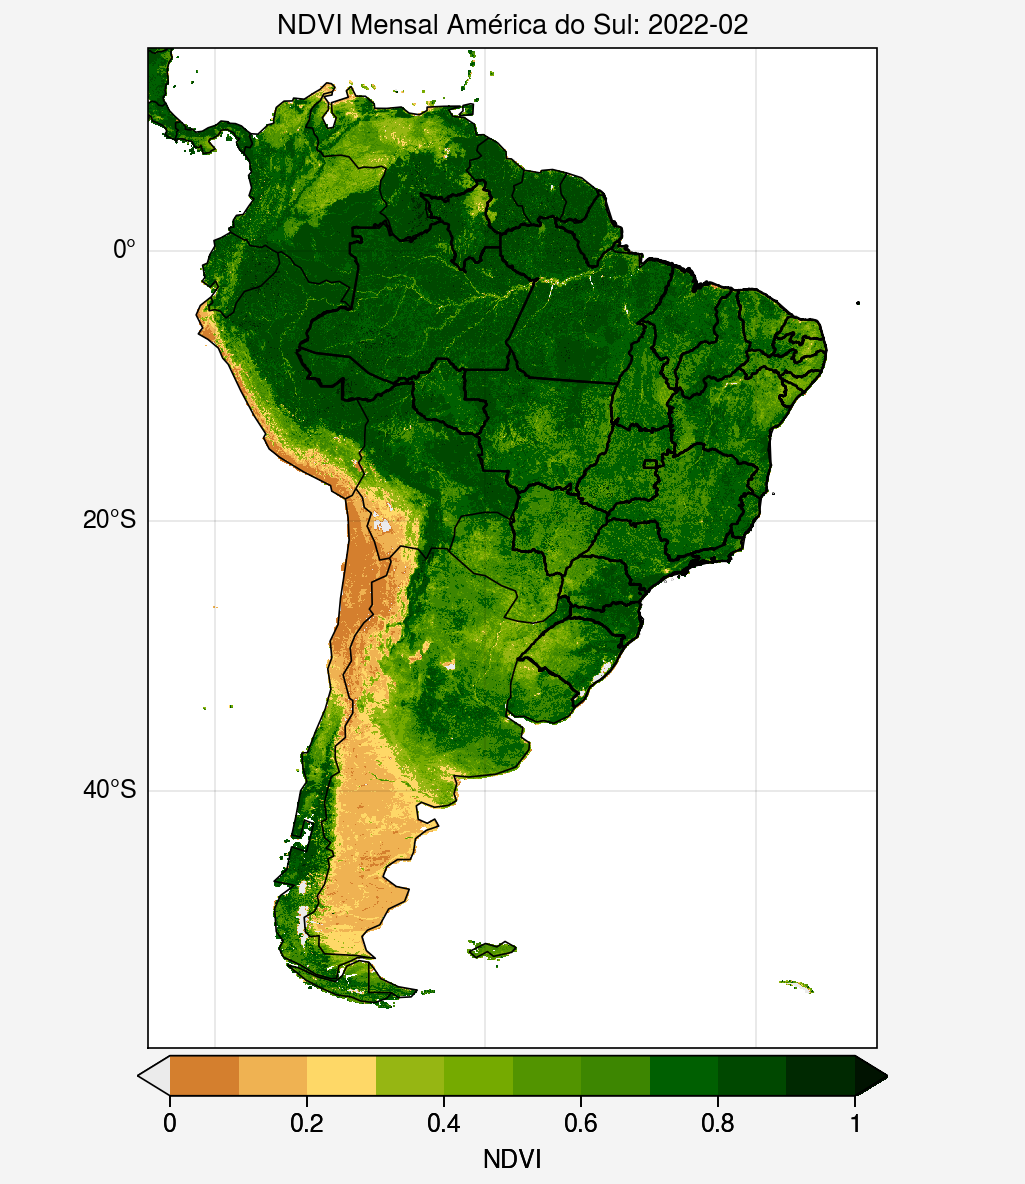

In [21]:
%%time
# define moldura da figura
fig, ax = plot.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# configuração dos eixos
ax.format(coast=True, borders=True, innerborders=False,
          labels=True,
          latlines=20, lonlines=20,
          latlim = (int(ndvi_mes_rec.lat[0]), int(ndvi_mes_rec.lat[-1])),
          lonlim = (int(ndvi_mes_rec.lon[0]), int(ndvi_mes_rec.lon[-1])),
          title=f'NDVI Mensal América do Sul: {ano}-{mes}')

# carrega tabela de cores
cpt_ndvi = loadCPT('/content/NDVI.cpt')
cpt_convert_ndvi = LinearSegmentedColormap('cpt_ndvi', cpt_ndvi)

# plota figura
map1 = ax.pcolormesh(ndvi_mes_rec['lon'],
                     ndvi_mes_rec['lat'],
                     ndvi_mes_rec[:,:]/10000.,
                     vmin=0,
                     vmax=1,
                     cmap=cpt_convert_ndvi,
                     levels=plot.arange(0, 1, 0.1),
                     extend='both')

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8, zorder=2)

# plota barra de cores
fig.colorbar(map1, loc='b', label='NDVI', space=0.3, length=0.75)

# salva figura
fig.save(f'{dir}output/Fig_2_ndvi_America_Sul_mensal_{ano}{mes}.jpg', dpi=300, bbox_inches='tight')

# **PARTE 4):** Plotando NDVI `ANUAL`
- Nesta etapa iremos gerar um mapa anual máximo de NDVI para o ano escolhido anteriormente.

## **Organizando os dados**

In [22]:
# mostra os dados que serão utilizados
ndvi

<xarray.DataArray 'ndvi' (time: 296, lat: 3600, lon: 7200)> Size: 31GB
[7672320000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-02-01 2000-03-01 ... 2024-09-01
  * lat      (lat) float64 29kB -90.0 -89.95 -89.9 -89.85 ... 89.85 89.9 89.95
  * lon      (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.8 179.9 179.9
Attributes:
    long_name:  ndvi

In [23]:
# seleciona o arquivo de NDVI daquele ANO
ndvi_ano = ndvi.sel(time=slice(f'{ano}', f'{ano}'))
ndvi_ano

<xarray.DataArray 'ndvi' (time: 12, lat: 3600, lon: 7200)> Size: 1GB
[311040000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 96B 2022-01-01 2022-02-01 ... 2022-12-01
  * lat      (lat) float64 29kB -90.0 -89.95 -89.9 -89.85 ... 89.85 89.9 89.95
  * lon      (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.8 179.9 179.9
Attributes:
    long_name:  ndvi

In [24]:
# calcula o valor máximo daquele ano. Demora aproximadamente 15 min
ndvi_ano_max = ndvi_ano.resample(time='1Y').max()

In [25]:
# mostrando o dado calculado
ndvi_ano_max

<xarray.DataArray 'ndvi' (time: 1, lat: 3600, lon: 7200)> Size: 104MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 29kB -90.0 -89.95 -89.9 -89.85 ... 89.85 89.9 89.95
  * lon      (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.8 179.9 179.9
  * time     (time) datetime64[ns] 8B 2022-12-31
Attributes:
    long_name:  ndvi

## **a) Plotando figura `ANUAL` global**

CPU times: user 1min 10s, sys: 4.65 s, total: 1min 15s
Wall time: 1min 16s


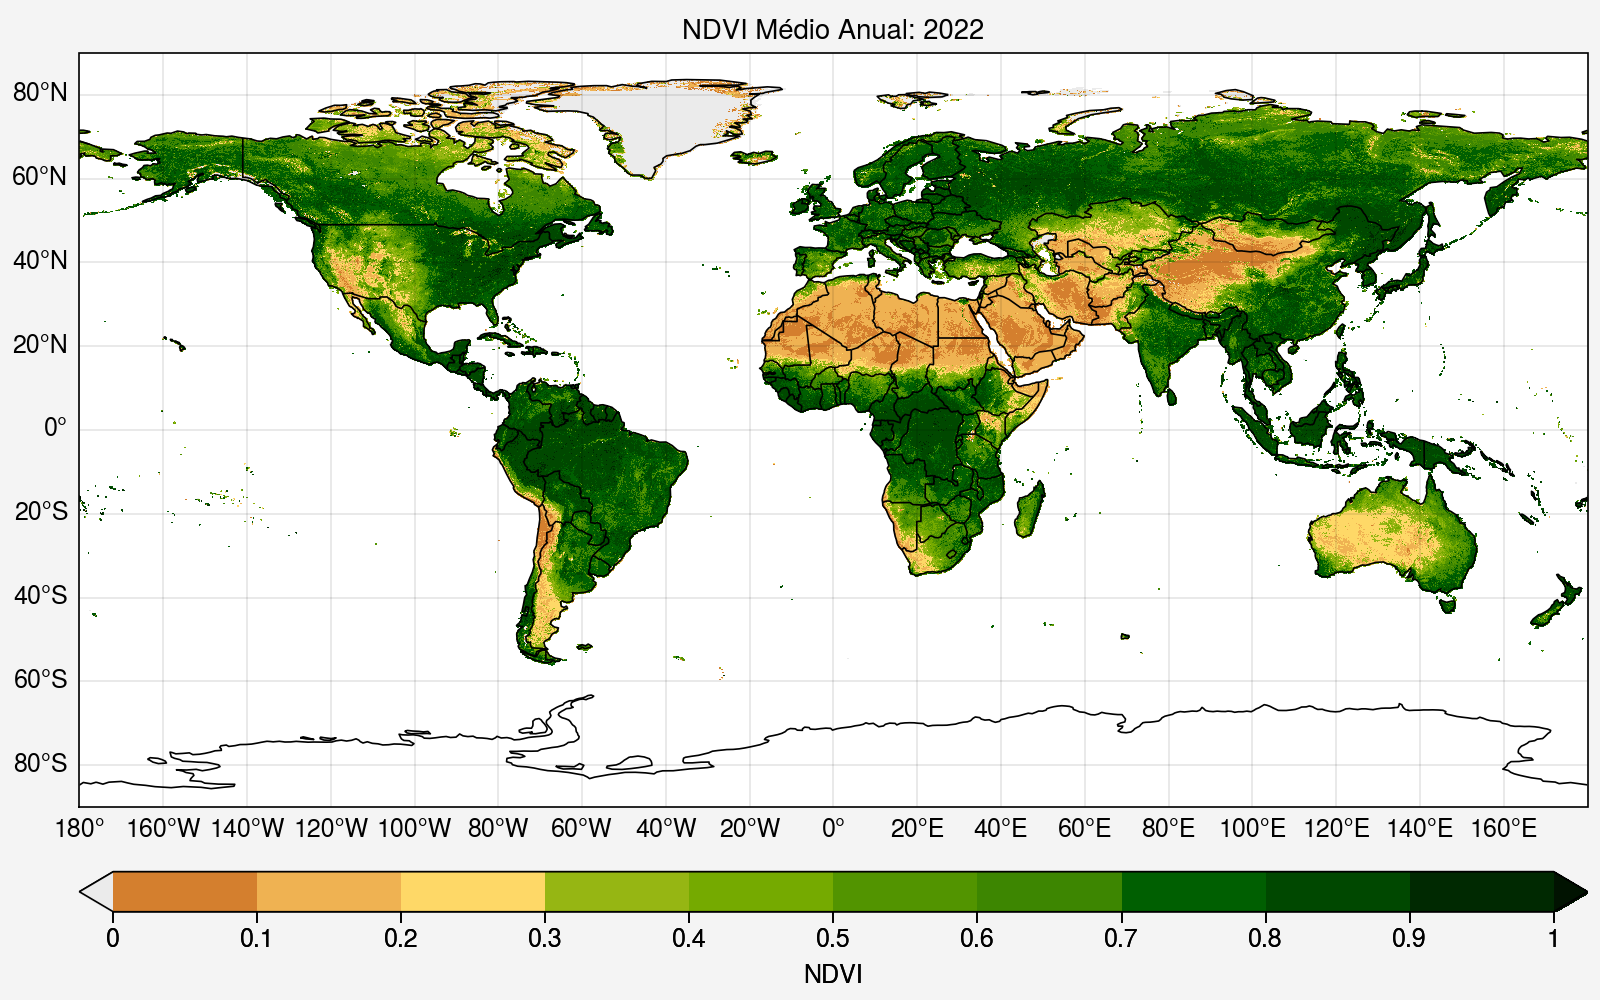

In [26]:
%%time
# moldura da figura
fig, ax = plot.subplots(figsize=(8, 5), tight=True, proj='pcarree')

# formatação dos eixos
ax.format(coast=True, borders=True, innerborders=False,
          labels=True,
          latlines=20, lonlines=20,
          title=f'NDVI Médio Anual: {ano}')

# carrega tabela de cores
cpt_ndvi = loadCPT('/content/NDVI.cpt')
cpt_convert_ndvi = LinearSegmentedColormap('cpt_ndvi', cpt_ndvi)

# plota figura
map1 = ax.pcolormesh(ndvi_ano_max['lon'],
                     ndvi_ano_max['lat'],
                     ndvi_ano_max[0,:,:]/10000.,
                     vmin=0,
                     vmax=1,
                     cmap=cpt_convert_ndvi,
                     levels=plot.arange(0, 1, 0.1),
                     extend='both')

# plota barra de cores
fig.colorbar(map1, loc='b', label='NDVI')

# salva figura
fig.save(f'{dir}output/Fig_3_ndvi_global_anual_{ano}.jpg', dpi=300, bbox_inches='tight')

## **b) Plotando figura `ANUAL` setorizada**

In [27]:
# mostra o dado que utilizaremos
ndvi_ano_max

<xarray.DataArray 'ndvi' (time: 1, lat: 3600, lon: 7200)> Size: 104MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 29kB -90.0 -89.95 -89.9 -89.85 ... 89.85 89.9 89.95
  * lon      (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.8 179.9 179.9
  * time     (time) datetime64[ns] 8B 2022-12-31
Attributes:
    long_name:  ndvi

In [28]:
# define a região de recorte
lonmin_AS, lonmax_AS, latmin_AS, latmax_AS = -85, -31, -59, 15

# realiza o recorte no dado
ndvi_ano_rec = ndvi_ano_max.sel(lon=slice(lonmin_AS, lonmax_AS), lat=slice(latmin_AS, latmax_AS))

# mostra o dado recortado
ndvi_ano_rec

<xarray.DataArray 'ndvi' (time: 1, lat: 1481, lon: 1081)> Size: 6MB
array([[[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ...,
        [8654., 8797., 8764., ...,   nan,   nan,   nan],
        [8281., 8382., 8865., ...,   nan,   nan,   nan],
        [8076., 8096., 8383., ...,   nan,   nan,   nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 12kB -59.0 -58.95 -58.9 -58.85 ... 14.9 14.95 15.0
  * lon      (lon) float64 9kB -85.0 -84.95 -84.9 -84.85 ... -31.1 -31.05 -31.0
  * time     (time) datetime64[ns] 8B 2022-12-31
Attributes:
    long_name:  ndvi

CPU times: user 15.8 s, sys: 528 ms, total: 16.3 s
Wall time: 22.3 s


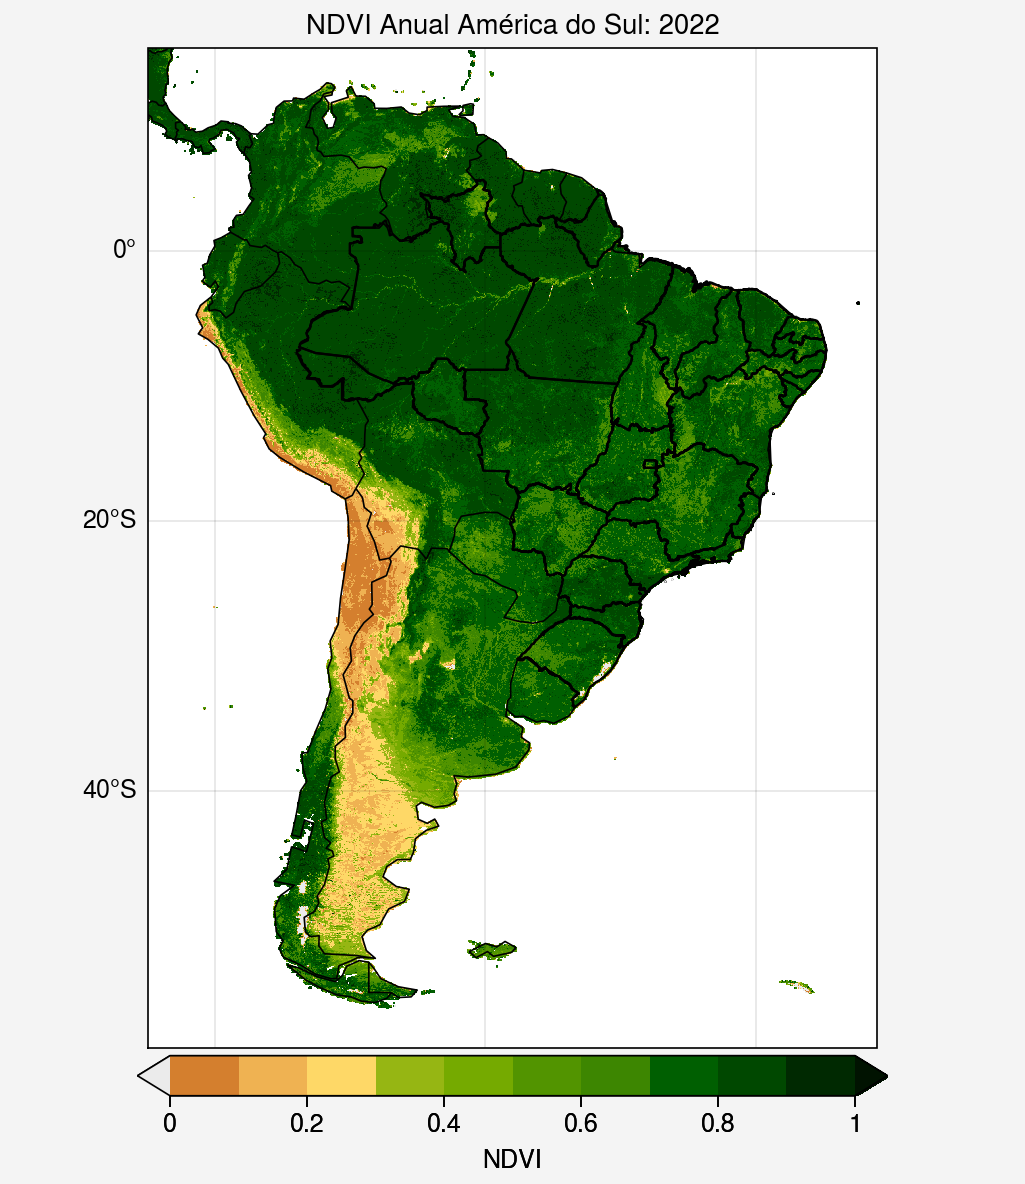

In [29]:
%%time
# define moldura da figura
fig, ax = plot.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# formatação dos eixos
ax.format(coast=True, borders=True, innerborders=False,
          labels=True,
          latlines=20, lonlines=20,
          latlim = (int(ndvi_ano_rec.lat[0]), int(ndvi_ano_rec.lat[-1])),
          lonlim = (int(ndvi_ano_rec.lon[0]), int(ndvi_ano_rec.lon[-1])),
          title=f'NDVI Anual América do Sul: {ano}')

# carrega tabela de cores
cpt_ndvi = loadCPT('/content/NDVI.cpt')
cpt_convert_ndvi = LinearSegmentedColormap('cpt_ndvi', cpt_ndvi)

# plota figura
map1 = ax.pcolormesh(ndvi_ano_rec['lon'],
                     ndvi_ano_rec['lat'],
                     ndvi_ano_rec[0,:,:]/10000.,
                     vmin=0,
                     vmax=1,
                     cmap=cpt_convert_ndvi,
                     levels=plot.arange(0, 1, 0.1),
                     extend='both')

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8, zorder=2)


# plota barra de cores
fig.colorbar(map1, loc='b', label='NDVI', space=0.3, length=0.75)

# salva figura
fig.save(f'{dir}output/Fig_4_ndvi_America_Sul_anual_{ano}.jpg', dpi=300, bbox_inches='tight')